In [1]:
from src import efficientNet
from src import pre_process
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
Image.MAX_IMAGE_PIXELS = 3000000000 

train1 = pd.read_csv("../Final-IRONHACK-Project/data/train1.csv")
train_x, valid_x, train_y, valid_y = pre_process.train_valid_split(train1)

train_generator, validation_generator = pre_process.image_generator_for_B0()

Found 80 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [2]:
print(validation_generator.class_indices)
print(train_generator.class_indices)
class_names = list(validation_generator.class_indices.keys())
class_names


{'0': 0, '1': 1}
{'0': 0, '1': 1}


['0', '1']

`EfficientNet model:`

In [42]:
import tensorflow as tf

In [43]:
efficient_model = efficientNet.EfficientNet()

architecture = efficient_model.efficient_model()
# architecture.summary()

efficient_model.compile_model()

In [44]:
efficient_model.model.summary()

Model: "EfficientNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_7 (Rescaling)        (None, 224, 224, 3)  0           ['input_8[0][0]']                
                                                                                                  
 normalization_7 (Normalization  (None, 224, 224, 3)  7          ['rescaling_7[0][0]']            
 )                                                                                                
                                                                                       

In [45]:
efficient_model.train(train_generator, validation_generator, epochs = 5)
class_names = list(validation_generator.class_indices.keys())
predictions = efficient_model.predict_efficientNet(validation_generator,class_names)

16/16 [==============================] - 1537s 96s/step - loss: 2.8871 - accuracy: 0.5000 - val_loss: 9475.1016 - val_accuracy: 0.5000


Found 80 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


1/1 [==============================] - 1s 738ms/step


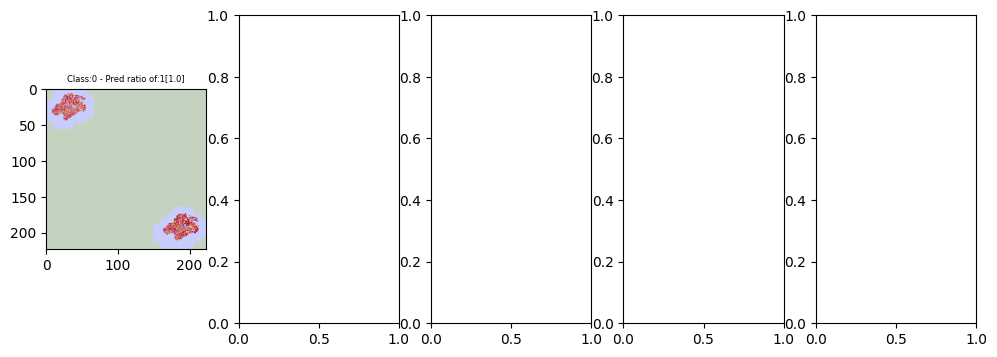

The training loss is of: [3.4782707691192627]
The validation loss is of: [3632.692626953125]
The training accuracy is of: [0.5249999761581421]
The validation accuracy is of: [0.5]
1/1 [==============================] - 0s 56ms/step
[[0. 1.]]
1/1 [==============================] - 0s 41ms/step
[[0. 1.]]
1/1 [==============================] - 0s 40ms/step
[[0. 1.]]
1/1 [==============================] - 0s 40ms/step
[[0. 1.]]


In [3]:
from tensorflow.keras.preprocessing import image
from src import efficientNet
from src import pre_process
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
Image.MAX_IMAGE_PIXELS = 3000000000 


def fer ():

    # 0. Data and instantiating
    train_generator, validation_generator = pre_process.image_generator_for_B0()

    efficient_model = efficientNet.EfficientNet()
    efficient_model.efficient_model()
    efficient_model.compile_model()

    # 1. Fitting the model
    hist = efficient_model.train(train_generator, validation_generator, epochs = 1)
    class_names = list(validation_generator.class_indices.keys())
    predictions = efficient_model.predict_efficientNet(validation_generator,class_names)

    # 2. Evaluating the model
    training_loss = hist.history['loss']
    print("The training loss is of:", training_loss)
    validation_loss = hist.history['val_loss']
    print("The validation loss is of:", validation_loss)
    training_accuracy = hist.history['accuracy']
    print("The training accuracy is of:", training_accuracy)
    validation_accuracy = hist.history['val_accuracy']
    print("The validation accuracy is of:", validation_accuracy)


    # 3. Predicting on new data
    test_path = ["D:/bootcamp/test/006388_0.tif","D:/bootcamp/test/008e5c_0.tif", "D:/bootcamp/test/00c058_0.tif", "D:/bootcamp/test/01adc5_0.tif"]

    preprocessed_images = []
    for img_path in test_path:
        img = image.load_img(img_path, target_size=(224, 224)) 
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) 
        img_array /= 255.0  
        preprocessed_images.append(img_array)

    for img in preprocessed_images:
        predictions = efficient_model.predict_on_data(img, class_names)
        print(predictions)

fer ()

In [46]:
training_loss = hist.history['loss']
print("The training loss is of:", training_loss)
validation_loss = hist.history['val_loss']
print("The validation loss is of:", validation_loss)
training_accuracy = hist.history['accuracy']
print("The training accuracy is of:", training_accuracy)
validation_accuracy = hist.history['val_accuracy']
print("The validation accuracy is of:", validation_accuracy)

The training loss is of: [2.8870909214019775]
The validation loss is of: [9475.1015625]
The training accuracy is of: [0.5]
The validation accuracy is of: [0.5]


In [47]:
import h5py

def inspect_h5_file(file_path):
    with h5py.File(file_path, 'r') as file:
        print("Groups and Datasets in the HDF5 file:")
        print("===================")
        def print_attrs(name, obj):
            print(name)
            if isinstance(obj, h5py.Group):
                print("Group attributes:", dict(obj.attrs))
            elif isinstance(obj, h5py.Dataset):
                print("Dataset shape:", obj.shape)
                print("Dataset attributes:", dict(obj.attrs))

        file.visititems(print_attrs)


inspect_h5_file('../Final-IRONHACK-Project/data/Efficient_weights.h5')

weights_path = '../Final-IRONHACK-Project/data/Efficient_weights.h5'

with h5py.File(weights_path, 'r') as f:
    keys = list(f.keys())
    print("Available keys:", keys)



Groups and Datasets in the HDF5 file:
avg_pool
Group attributes: {'weight_names': array([], dtype=float64)}
batch_normalization_3
Group attributes: {'weight_names': array(['batch_normalization_3/gamma:0', 'batch_normalization_3/beta:0',
       'batch_normalization_3/moving_mean:0',
       'batch_normalization_3/moving_variance:0'], dtype=object)}
batch_normalization_3/batch_normalization_3
Group attributes: {}
batch_normalization_3/batch_normalization_3/beta:0
Dataset shape: (1280,)
Dataset attributes: {}
batch_normalization_3/batch_normalization_3/gamma:0
Dataset shape: (1280,)
Dataset attributes: {}
batch_normalization_3/batch_normalization_3/moving_mean:0
Dataset shape: (1280,)
Dataset attributes: {}
batch_normalization_3/batch_normalization_3/moving_variance:0
Dataset shape: (1280,)
Dataset attributes: {}
block1a_activation
Group attributes: {'weight_names': array([], dtype=float64)}
block1a_bn
Group attributes: {'weight_names': array(['block1a_bn/gamma:0', 'block1a_bn/beta:0',
   

In [48]:
efficient_model.get_weights('../Final-IRONHACK-Project/data/Efficient_weights.h5')

1/1 [==============================] - 1s 790ms/step


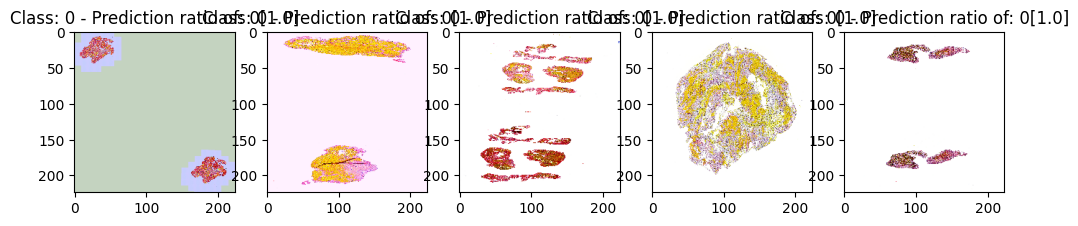

In [49]:
class_names = list(validation_generator.class_indices.keys())
class_names
predictions = efficient_model.predict_efficientNet(validation_generator,class_names)

`Predict on new images:`

In [50]:
efficient_model_test = efficientNet.EfficientNet()
efficient_model_test.load_weights('../Final-IRONHACK-Project/data/Efficient_weights.h5')

In [51]:
from tensorflow.keras.preprocessing import image

test_path = ["D:/bootcamp/test/006388_0.tif","D:/bootcamp/test/008e5c_0.tif", "D:/bootcamp/test/00c058_0.tif", "D:/bootcamp/test/01adc5_0.tif"]

preprocessed_images = []
for img_path in test_path:
    img = image.load_img(img_path, target_size=(224, 224)) 
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) 
    img_array /= 255.0  
    preprocessed_images.append(img_array)

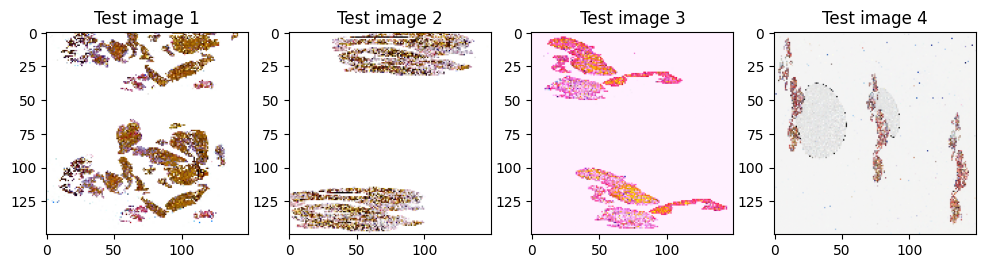

In [52]:
fig, axes = plt.subplots(1, len(test_path), figsize=(12, 4))

for i, img_path in enumerate(test_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Plot the preprocessed image
    axes[i].imshow(img_array[0])
    axes[i].set_title(f'Test image {i+1}')

plt.show()

In [53]:
class_names

['0', '1']

In [54]:
for img in preprocessed_images:
    predictions = efficient_model_test.predict_on_data(img, class_names)
    print(predictions)

1/1 [==============================] - 1s 758ms/step
[[1. 0.]]
1/1 [==============================] - 0s 44ms/step
[[1. 0.]]
1/1 [==============================] - 0s 43ms/step
[[1. 0.]]
1/1 [==============================] - 0s 45ms/step
[[1. 0.]]
